## Manifold Learning with t-SNE

While PCA is often a good first approach for transforming your data so that you might be able to visualize it using a scatter plot, the nature of the method (applying a rotation and then dropping directions) limits its usefulness, as we saw with the scatter plot of the *Labeled Faces in the Wild* dataset. 

There is a class of algorithms for visualization called *manifold learning algorithms* that allow for much more complex mappings, and often provide better visualizations. A particularly useful one is the t-SNE algorithm.

Manifold learning algorithms are mainly aimed at visualization, and so are rarely used to generate more than two new features. Some of them, including *t-SNE*, compute a new representation of the training data, but don’t allow transformations of new data. This means these algorithms cannot be applied to a test set: rather, they can only transform the data they were trained for. Manifold learning can be useful for exploratory data analysis, but is rarely used if the final goal is supervised learning. 

The idea behind *t-SNE* is to find a two-dimensional representation of the data that preserves the distances between points as best as possible. t-SNE starts with a random two-dimensional representation for each data point, and then tries to make points that are close in the original feature space closer, and points that are far apart in the original feature space farther apart. t-SNE puts more emphasis on points that are close by, rather than preserving distances between far-apart points. In other words, it tries to preserve the information indicating which points are neighbors to each other.

We will apply the t-SNE manifold learning algorithm on a dataset of handwritten digits that is included in scikit-learn.  Each data point in this dataset is an 8×8 grayscale image of a handwritten digit between 0 and 9. Here we show an example image for each class:

In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

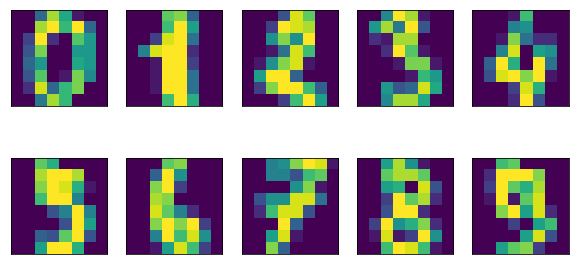

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Let’s use PCA to visualize the data reduced to two dimensions. We plot the first two principal components, and represent each sample with a digit corresponding to its class.

Text(0, 0.5, 'Second principal component')

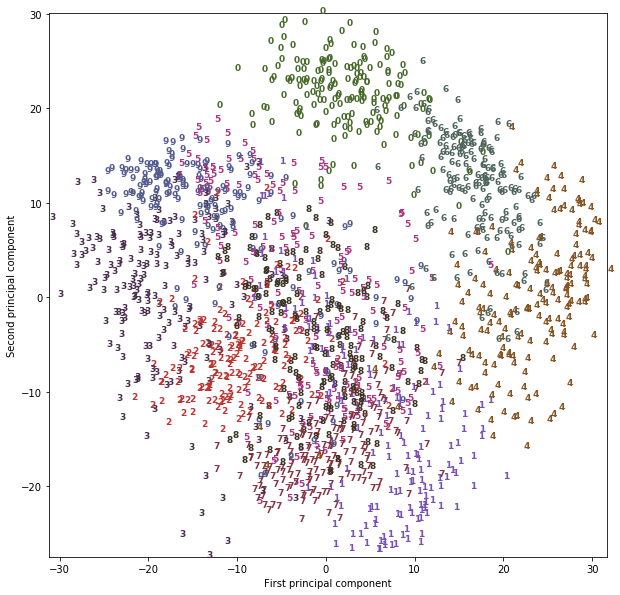

In [4]:
from sklearn.decomposition import PCA

# Build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

# Transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # Actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Here, we actually used the true digit classes as glyphs, to show which class is where. The digits zero, six, and four are relatively well separated using the first two principal components, though they still overlap. Most of the other digits overlap significantly.